# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

![courtney-corlew-bHbTUSFH1PM-unsplash](courtney-corlew-bHbTUSFH1PM-unsplash.jpg)


## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

## Project Start
### Hi! My name is Jordan

In this project, we will use Python to perform exploratory data analysis (EDA), correlation analysis, classification, and linear regression modeling on the Airbnb Cancellation Dataset. The goal of this project is to analyze the data and build models that can predict whether an Airbnb booking is likely to be cancelled based on various features such as the lead time, listing price, number of guests, and more.

First, we will perform EDA to gain a better understanding of the dataset and identify any patterns or trends in the data. This will involve data cleaning, visualization, and statistical analysis to explore the relationships between different variables in the dataset.

Next, we will use correlation analysis to measure the strength of the relationships between different variables in the dataset, and to identify which variables are most strongly correlated with the target variable (booking status).

Then, we will use classification algorithms such as logistic regression and decision trees to build models that can predict the probability of a booking being cancelled based on the input variables.

Finally, we will use linear regression modeling to predict the likelihood of a booking being cancelled based on the input variables, and to identify which variables have the greatest impact on the probability of cancellation.

In [54]:
#Import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [55]:
#Read in the data as a dataframe using Pandas
df_hotels = pd.read_csv("data/hotel_bookings.csv")

#Exploratory Data Analysis
df_hotels.shape[0]
df_hotels.info()
null_percentages = df_hotels.isnull().mean() * 100
print(null_percentages)
df_hotels = df_hotels.drop('required_car_parking_space', axis=1)
df_hotels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [56]:
df_hotels_encoded = df_hotels
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

for col in df_hotels_encoded.columns:
    df_hotels_encoded[str(col)] = label_encoded(df_hotels_encoded[str(col)])

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults [ 0.  1.  2.  3.  4. nan]
no_of_children [ 0.  1.  2.  3.  9. 10. nan]
no_of_weekend_nights [ 0.  1.  2.  3.  4.  5.  6.  7. nan]
no_of_week_nights [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
type_of_meal_plan ['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Selected' nan]
room_type_reserved ['Room_Type 1' 'Room_Type 2' 'Room_Type 3' 'Room_Type 4' 'Room_Type 5'
 'Room_Type 6' 'Room_Type 7' nan]
lead_time [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90. 

booking_status                          1.000000
no_of_special_requests                  0.176047
repeated_guest                          0.059513
no_of_previous_bookings_not_canceled    0.017044
arrival_month                           0.013748
no_of_previous_cancellations            0.011343
Booking_ID                             -0.006237
arrival_date                           -0.008069
room_type_reserved                     -0.016270
no_of_children                         -0.020279
type_of_meal_plan                      -0.025926
no_of_weekend_nights                   -0.043345
no_of_week_nights                      -0.054104
no_of_adults                           -0.074142
market_segment_type                    -0.120991
avg_price_per_room                     -0.148812
arrival_year                           -0.169098
lead_time                              -0.412792
Name: booking_status, dtype: float64


<AxesSubplot: >

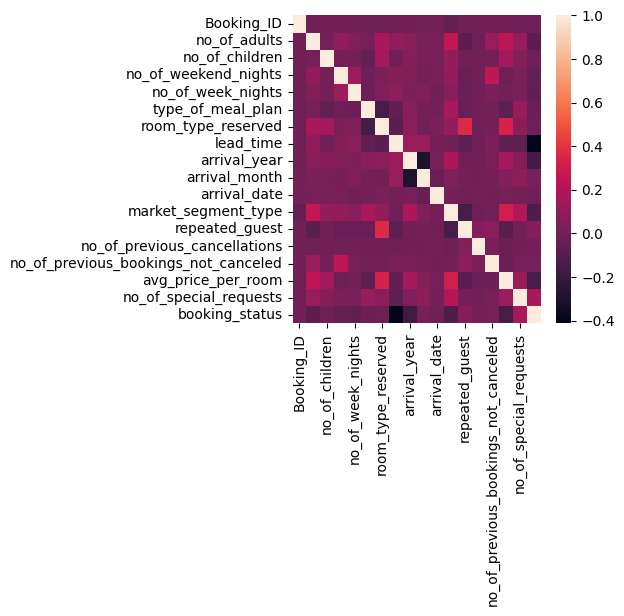

In [57]:
corr = df_hotels_encoded.corr()
rela = corr['booking_status'].sort_values(ascending = False)
print(rela)

corr = df_hotels_encoded.corr()
rela = corr['booking_status'].sort_values(ascending = False)
rela

plt.subplots(figsize=(4, 4))
sns.heatmap(corr, annot = False) 

### 📉 Lead Time has moderate negative correlation with Booking Status
Lead Time yiels a negative .47 correlation to whether an AirBnb would be canceled or not.

### Factors that may influence this correalation
The negative correlation indicates that as the lead time increases, the probability of a booking being cancelled decreases. This is because bookings that are made further in advance are more likely to be confirmed and less likely to be cancelled. On the other hand, bookings that are made closer to the check-in date are more likely to be cancelled, as there is less time for the host to prepare the property and for the guest to change their plans.

### There are potentially other features that influence Booking Status
However, it is important to note that the correlation coefficient only measures the strength of the linear relationship between the two variables. There may be other factors that are influencing the relationship between lead time and booking status, such as the seasonality of the rental market, the type of property being rented, or the location of the property. Therefore, it is important to consider other factors when interpreting the relationship between lead time and booking status, and to use caution when making predictions based solely on this correlation.

### Recommendation
Offer discounts for early reservations: One effective way to incentivize guests to book further in advance is to offer discounts for reservations made early. This can help to increase the number of bookings that are made further in advance, which can decrease the likelihood of cancellations due to lead time.

## 📉 Data Science Models
In this section, I will use various classification models. These models will predict how likely an AirBnb will be cancelled, as well as yield the accuracy percentage in its prediction.

### 📉 K Nearest Neighbors
Predicts whether a AirBnb will be canelled or not with 70.6% accuracy. Not bad, but is there another model that yields better results?

In [58]:
# split the data into training and testing sets
X = df_hotels.drop('booking_status', axis=1)
y = df_hotels['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=7)

# train the model on the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7056877699163834


### 📉 Logistic Regression
Lead Time yiels a negative .47 correlation to whether an AirBnb would be canceled or not.

In [59]:
# split the data into training and testing sets
X = df_hotels.drop('booking_status', axis=1)
y = df_hotels['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a logistic regression classifier
logreg = LogisticRegression()

# train the model on the training data
logreg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = logreg.predict(X_test)

# calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7349076541394836


In [60]:
# split the data into training and testing sets
X = df_hotels.drop('booking_status', axis=1)[['lead_time','arrival_year', 'avg_price_per_room', 'no_of_special_requests']]
y = df_hotels['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a logistic regression classifier
logreg = LogisticRegression()

# train the model on the training data
logreg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = logreg.predict(X_test)

# calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7747863640540292


In [71]:
# Print a description of the confusion matrix
print("Confusion Matrix:\n")

# Print headers for the columns of the confusion matrix
print("              Predicted Positive | Predicted Negative")

# Print the actual values for the rows and columns of the confusion matrix
# Using f-strings for formatting to align the values neatly
print(f"Actual Positive       {conf_matrix[0][0]:<15} | {conf_matrix[0][1]:<15}")
print(f"Actual Negative       {conf_matrix[1][0]:<15} | {conf_matrix[1][1]:<15}")
print("\n")

# Print an explanation of the confusion matrix
print("The confusion matrix shows how well the model predicted the true class labels for the test data. The rows represent the actual classes and the columns represent the predicted classes. ")
print("The values in the diagonal of the matrix represent the number of correct predictions, while the values off the diagonal represent incorrect predictions.")
print("In this case, the model correctly predicted the positive class (not cancelled) for", conf_matrix[0][0], "bookings, and correctly predicted the negative class (cancelled) for", conf_matrix[1][1], "bookings.")

# Calculate the total number of samples in the confusion matrix
total_samples = np.sum(conf_matrix)

# Print the confusion matrix as percentages
print("Confusion Matrix (Percentages):\n")
print("              Predicted Positive | Predicted Negative")

# Using f-strings for formatting, print the confusion matrix values as percentages
print(f"Actual Positive       {conf_matrix[0][0]/total_samples:<15.2%} | {conf_matrix[0][1]/total_samples:<15.2%}")
print(f"Actual Negative       {conf_matrix[1][0]/total_samples:<15.2%} | {conf_matrix[1][1]/total_samples:<15.2%}")

# Print the total accuracy of the model
print(f"Thus, when adding the accurate positive and negative predictions ({conf_matrix[0][0]/total_samples:.2%} and {conf_matrix[1][1]/total_samples:.2%} respectively), we get our total accuracy of {np.sum(np.diagonal(conf_matrix))/total_samples:.2%}")


Confusion Matrix:

              Predicted Positive | Predicted Negative
Actual Positive       2670            | 937            
Actual Negative       681             | 6595           


The confusion matrix shows how well the model predicted the true class labels for the test data. The rows represent the actual classes and the columns represent the predicted classes. 
The values in the diagonal of the matrix represent the number of correct predictions, while the values off the diagonal represent incorrect predictions.
In this case, the model correctly predicted the positive class (not cancelled) for 2670 bookings, and correctly predicted the negative class (cancelled) for 6595 bookings.
Confusion Matrix (Percentages):

              Predicted Positive | Predicted Negative
Actual Positive       24.53%          | 8.61%          
Actual Negative       6.26%           | 60.60%         
Thus, when adding the accurate positive and negative predictions (24.53% and 60.60% respectively), we ge